# Imputing Missing Data from Breast Cancer Data
The breast cancer data set ([Breast Cancer Wisconsin (Original)](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)) from the UCI Machine Learning Repository has missing values.
### Data Description

1. Sample code number:            id number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)

## Goals
1. Test different ways to impute values for missing data
2. Asses accuracy and quality of imputation models

In [1]:
cancer <- read.table('./breast-cancer-wisconsin.data.txt', stringsAsFactors = FALSE, header = FALSE, sep=',')

In [2]:
head(cancer)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


## Exploratory Analysis - Finding Our Missing Data
* In the summary below, we can see that column V7 is listed as a Character class. Everyother column has quantitiative statistics

In [3]:
summary(cancer)

       V1                 V2               V3               V4        
 Min.   :   61634   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:  870688   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 1171710   Median : 4.000   Median : 1.000   Median : 1.000  
 Mean   : 1071704   Mean   : 4.418   Mean   : 3.134   Mean   : 3.207  
 3rd Qu.: 1238298   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000  
 Max.   :13454352   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V5               V6              V7                  V8        
 Min.   : 1.000   Min.   : 1.000   Length:699         Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   Class :character   1st Qu.: 2.000  
 Median : 1.000   Median : 2.000   Mode  :character   Median : 3.000  
 Mean   : 2.807   Mean   : 3.216                      Mean   : 3.438  
 3rd Qu.: 4.000   3rd Qu.: 4.000                      3rd Qu.: 5.000  
 Max.   :10.000   Max.   :10.000                      Max.   :10.000  
      

#### Looking more into Column V7
* The column V7 represents Bare Nuclei (nuclei that is not surrounded by cytoplasm).
* The unique function displays all unique values in this particular column.
* We can see a '?' as one of the possible values in column V7
* This is our missing data

In [4]:
unique(cancer$V7)

[1] "1"  "10" "2"  "4"  "3"  "9"  "7"  "?"  "5"  "8"  "6"

In [5]:
# Counting missing values
cat("There are", sum(cancer$V7 == '?'), "missing values\n\n")
# Identifying indicies that have missing values
inds <- which(cancer$V7 == '?')
cat(length(inds)/nrow(cancer), "of the data is missing")

There are 16 missing values

0.02288984 of the data is missing

Proportion of Benign Cancers in Missing data: 0.875 
Proportion of Malignant Cancers in Missing data: 0.125 
Proportion of Benign Cancers in Cleaned data: 0.6500732 
Proportion of Malignant Cancers in Cleaned data: 0.3499268

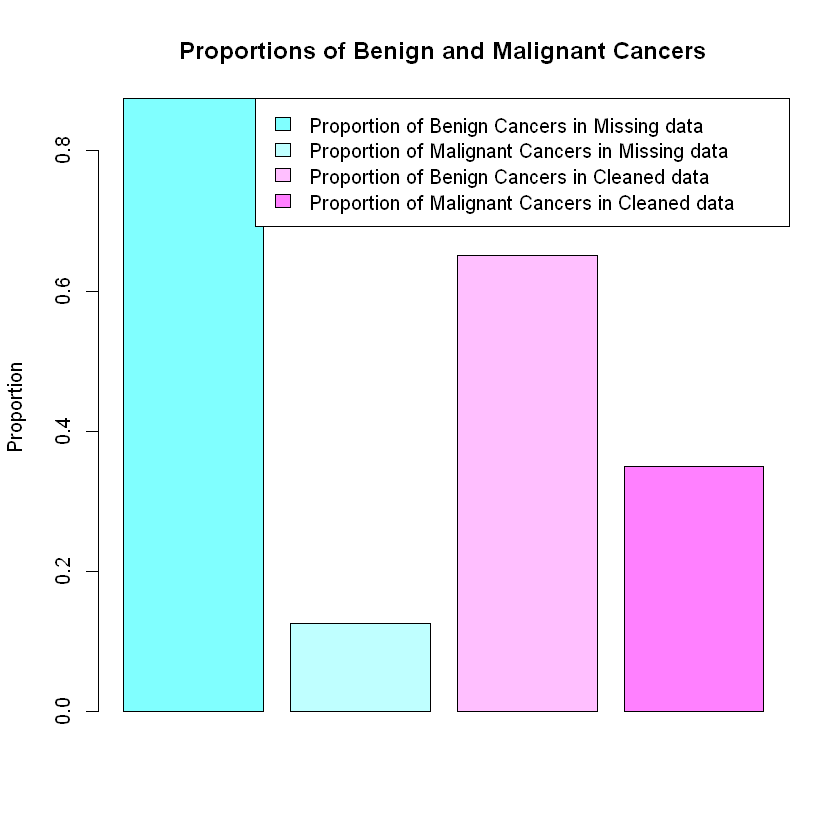

In [6]:
benignMissing = sum(cancer[inds,]$V11 == 2)/length(inds)
maligMissing = sum(cancer[inds,]$V11 == 4)/length(inds)
benignFullData = sum(cancer[-inds,]$V11 == 2)/(nrow(cancer)-length(inds))
maligFullData = sum(cancer[-inds,]$V11 == 4)/(nrow(cancer)-length(inds))
proportions <- c(benignMissing, maligMissing, benignFullData, maligFullData)
names <- c("Proportion of Benign Cancers in Missing data","Proportion of Malignant Cancers in Missing data","Proportion of Benign Cancers in Cleaned data", "Proportion of Malignant Cancers in Cleaned data" )
barplot(proportions, 
       main = "Proportions of Benign and Malignant Cancers",
       ylab = 'Proportion',
        legend = TRUE,
       col = cm.colors(4))
legend(x = 'topright', legend = names, fill = cm.colors(4))
cat("Proportion of Benign Cancers in Missing data:", benignMissing, '\n')
cat("Proportion of Malignant Cancers in Missing data:", maligMissing, '\n')
cat("Proportion of Benign Cancers in Cleaned data:", benignFullData, '\n')
cat("Proportion of Malignant Cancers in Cleaned data:", maligFullData)

* There is a clear difference when considering the proportion of malignant cancers in the missing and clean data.
* It seems that there are is a much higher proportion of benign cancers in the missing data than that of the clean data (0.875 vs 0.65)

## Imputation with Mode/Mean

In [7]:
Mode <- function(lst) {
  uniq <- unique(lst)
  uniq[which.max(tabulate(match(lst, uniq)))]
}

In [8]:
mu <- mean(as.numeric(cancer[-inds,]$V7))
mode <- Mode(as.numeric(cancer[-inds,]$V7))
cat("Imputed value (mean) for missing values of the Bare Nuclei Column:", mu)
cat("\nImputed value (mode) for missing values of the Bare Nuclei Column:", mode)

Imputed value (mean) for missing values of the Bare Nuclei Column: 3.544656
Imputed value (mode) for missing values of the Bare Nuclei Column: 1

## Imputation with Regression

In [9]:
cleaned <- cancer[-inds,]
cleaned$V7 <- as.numeric(cleaned$V7)

In [10]:
lmModel <- lm(V7~., data=cleaned)
summary(lmModel)


Call:
lm(formula = V7 ~ ., data = cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5771 -0.4427 -0.2088  0.8940  8.6145 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.039e+00  3.487e-01 -11.582  < 2e-16 ***
V1          -1.656e-07  1.240e-07  -1.335  0.18223    
V2           1.825e-02  3.960e-02   0.461  0.64499    
V3          -1.594e-01  6.731e-02  -2.369  0.01813 *  
V4           1.863e-01  6.548e-02   2.844  0.00459 ** 
V5           2.194e-01  4.124e-02   5.320 1.42e-07 ***
V6           1.872e-02  5.520e-02   0.339  0.73457    
V8           1.505e-01  5.327e-02   2.825  0.00487 ** 
V9          -8.724e-02  3.967e-02  -2.199  0.02821 *  
V10         -6.365e-02  5.215e-02  -1.220  0.22272    
V11          2.495e+00  1.784e-01  13.990  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.999 on 672 degrees of freedom
Multiple R-squared:  0.7035,	Adjusted R-squared:  0.6991 
F-st

### Evaluating our Basic Linear Regression Model
* R-squared value is .7. 
* This model could be very overfit
* Below, I removed insignificant variables based on the singifiance codes in the summary above

In [11]:
lmModel1 <- lm(V7~V3+V4+V5+V8+V9+V11, data=cancer[-inds,])
lmPredicted <- predict(lmModel, newdata = cancer[inds,])
df <- data.frame(lmPredicted)
cat("Average Predicted Value using Basic Linear Regression Model:", mean(lmPredicted))
df

Average Predicted Value using Basic Linear Regression Model: 2.251872

,lmPredicted
,<dbl>
24,7.191237
41,3.419208
140,1.188951
146,1.579936
159,1.260453
165,1.428797
236,1.943842
250,1.562574
276,1.740990


* I computed the average of the predicted V7 missing values to be 2.25. This is pretty close to the mean of the whole data set (3.544) 
* It seems that data in row 24 is a lot different than the others.


## Implementing Regression Tree for Predictions

In [12]:
# install.packages('tree')
library(tree)
set.seed(777)

In [13]:
treeModel <- tree(V7~., data=cleaned)
summary(treeModel)


Regression tree:
tree(formula = V7 ~ ., data = cleaned)
Variables actually used in tree construction:
[1] "V11" "V3" 
Number of terminal nodes:  3 
Residual mean deviance:  4.082 = 2776 / 680 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -6.628  -0.254  -0.254   0.000   0.746   8.746 

* As seen above, only V11 and V3 were deemed necessary for regression in the tree

### Analysis of Regression Tree
* Below, the regression tree will determine if the sample is Malignant or Benign (V11 > 3 or V11 < 3) 
* If the cancer sample is benign (V11 < 3), it will determine if the sample has a Uniformity of Cell Size greater or less than 3.5 (V3 < 3.5 or V3 > 3.5)

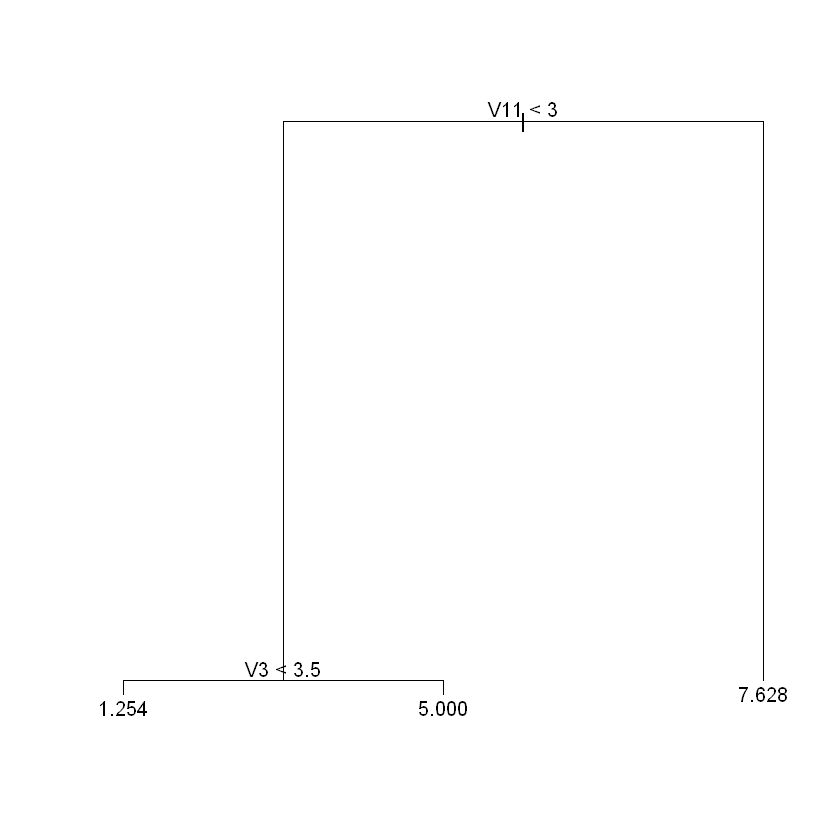

In [14]:
plot(treeModel)
text(treeModel)

### Manually Calculating $R^2$ For Unpruned Tree
* $R^2$ is generally a good way to measure how well our model fits our data
* We'll follow the general equation below:
> $R^2 = 1 = \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y}_i)^2}$

In [15]:
R2Calculate <- function(inputTree){
    yHat <- predict(inputTree)
    yMean <- mean(cleaned$V7)
    y_i <- cleaned$V7
    numer <- sum((y_i-yHat)**2)
    denom <- sum((y_i-yMean)**2)
    r2 <- 1 - (numer/denom)
    return (r2)
}

In [16]:
cat("R-squared value for Unpruned Tree:", R2Calculate(treeModel))

R-squared value for Unpruned Tree: 0.6934518

* A $R^2$ value of 0.69 is relatively strong

### Cross-validating and Pruning our Tree
* The plot below suggests that our deviance flattens as the terminal nodes goes to 2. 
* Cross-validation tells us that the 2nd branching isn't really necessary

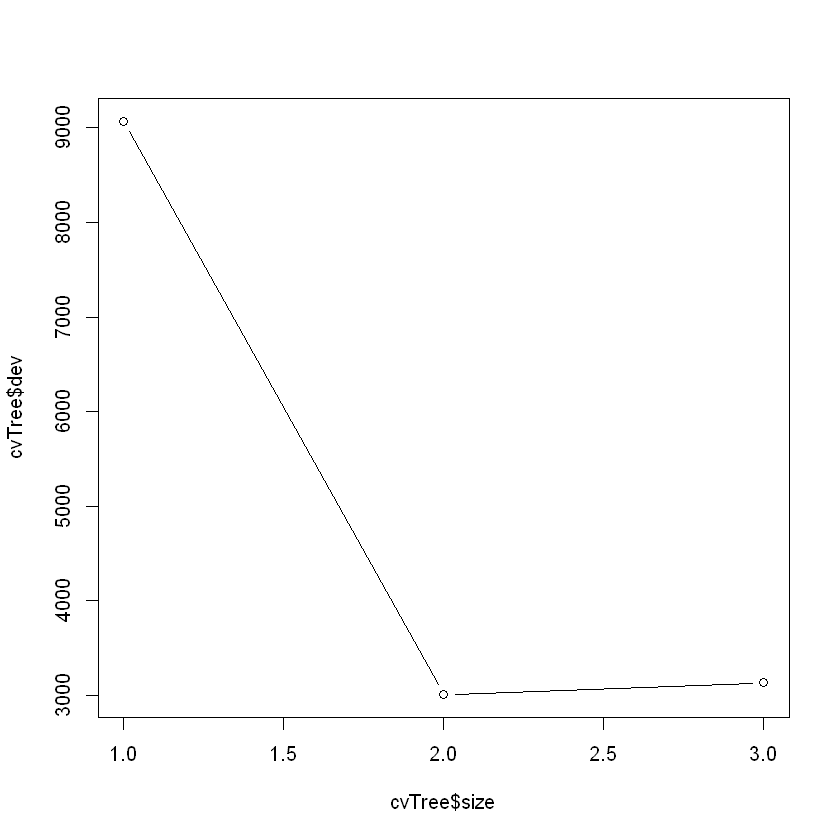

In [17]:
cvTree <- cv.tree(treeModel)
plot(cvTree$size, cvTree$dev, type = 'b')

In [18]:
numNodes <- 2
prunedTree <- prune.tree(treeModel, best = numNodes)

In [19]:
summary(prunedTree)


Regression tree:
snip.tree(tree = treeModel, nodes = 2L)
Variables actually used in tree construction:
[1] "V11"
Number of terminal nodes:  2 
Residual mean deviance:  4.297 = 2926 / 681 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.6280 -0.3468 -0.3468  0.0000  1.3720  8.6530 

#### Here's our pruned Tree
* The tree only determines if the cancer sample is benign or malignant. Based on this, we can determine the missing values in V7

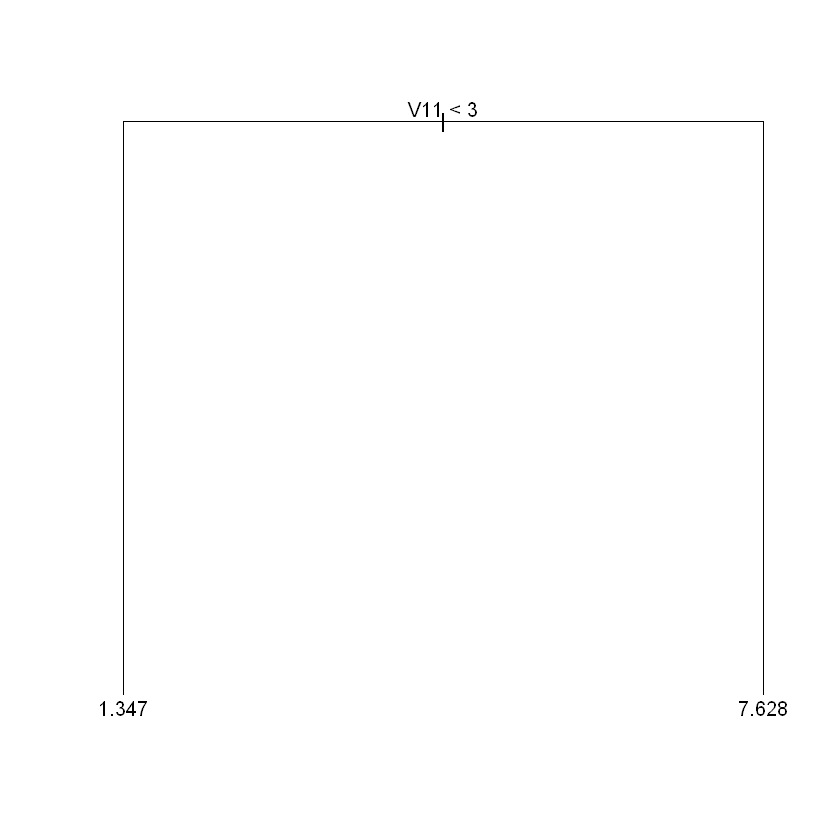

In [20]:
plot(prunedTree)
text(prunedTree)

In [21]:
cat("R-squared value for Unpruned Tree:", R2Calculate(prunedTree))

R-squared value for Unpruned Tree: 0.6768285

* Our R-squared value for our cross-validated, pruned tree is a bit worse than our unpruned tree.
* Let's go ahead and proceed with the unpruned tree

### Imputing Values from Linear Regression Model and Regression Tree
* See that the values are pretty close. 
* I included the V11 column to make sense of why there are inflated values
* It seems that if the cancer is malignantl, the value for V7 is larger

In [22]:
treeModelPredict <- data.frame(predict(treeModel, newdata = cancer[inds,]))
BenignOrMalignant <- cancer[inds,]$V11
both <- cbind(df, treeModelPredict, BenignOrMalignant)
colnames(both) <- c('Linear Regression', 'Regression Tree', 'Benign Or Malignant')
both

,Linear Regression,Regression Tree,Benign Or Malignant
,<dbl>,<dbl>,<int>
24,7.191237,7.627615,4
41,3.419208,5.000000,2
140,1.188951,1.254042,2
146,1.579936,1.254042,2
159,1.260453,1.254042,2
165,1.428797,1.254042,2
236,1.943842,1.254042,2
250,1.562574,1.254042,2
276,1.740990,1.254042,2


### Assessing Accuracy of Imputed Values using Linear Regression,  Tree Regression Models, and Imputing via Mean/Mode.

In [23]:
# Splitting Data
set.seed(777)
trainSize <- floor(0.75 * nrow(cleaned))
indTrain <- sample(seq_len(nrow(cleaned)), size = trainSize)
train <- cleaned[indTrain, ]
test <- cleaned[-indTrain, ]

In [24]:
# Training our Models on Training data
lmModel1 <- lm(V7~., data=train)
treeModel1 <- tree(V7~., data=train)

In [25]:
# Predicting V7 values in the test data
lmPredictedTest <- as.integer(predict(lmModel1, newdata=test))
treePredictedTest <- as.integer(predict(treeModel1,newdata=test))

In [26]:
# Determining accuracy of model when predicting V7 values
lmAccuracyVals <- sum(lmPredictedTest == test$V7) / nrow(test)
treeAccuracyVals <- sum(treePredictedTest == test$V7) / nrow(test)
modeAccuracyVals <- sum(mode == test$V7) / nrow(test)
meanAccuracyVals <- sum(as.integer(mu) == test$V7) / nrow(test)
cat('Accuracy of linear regression model on test data:', lmAccuracyVals)
cat('\nAccuracy of tree regression model on test data:', treeAccuracyVals)
cat('\nAccuracy of imputing using mode test data:', modeAccuracyVals)
cat('\nAccuracy of imputing using mean model on test data:', meanAccuracyVals)

Accuracy of linear regression model on test data: 0.5438596
Accuracy of tree regression model on test data: 0.6023392
Accuracy of imputing using mode test data: 0.5964912
Accuracy of imputing using mean model on test data: 0.01754386

## Conclusions
* Above i've calculated the accuracy values. 
* The accuracy of the tree regression model on our test data did marginally better than just using the mode to impute column V7 values (0.6023392 vs 0.5964912)
* Using the mean performed worst on the data. We see a lot of 1's in the V7 data. (see below for a density plot)


In [27]:
library(ggplot2)

As seen below, we can clearly see that there are a lot of 1's in our V7 data. This is why the mean performed so badly on our test data

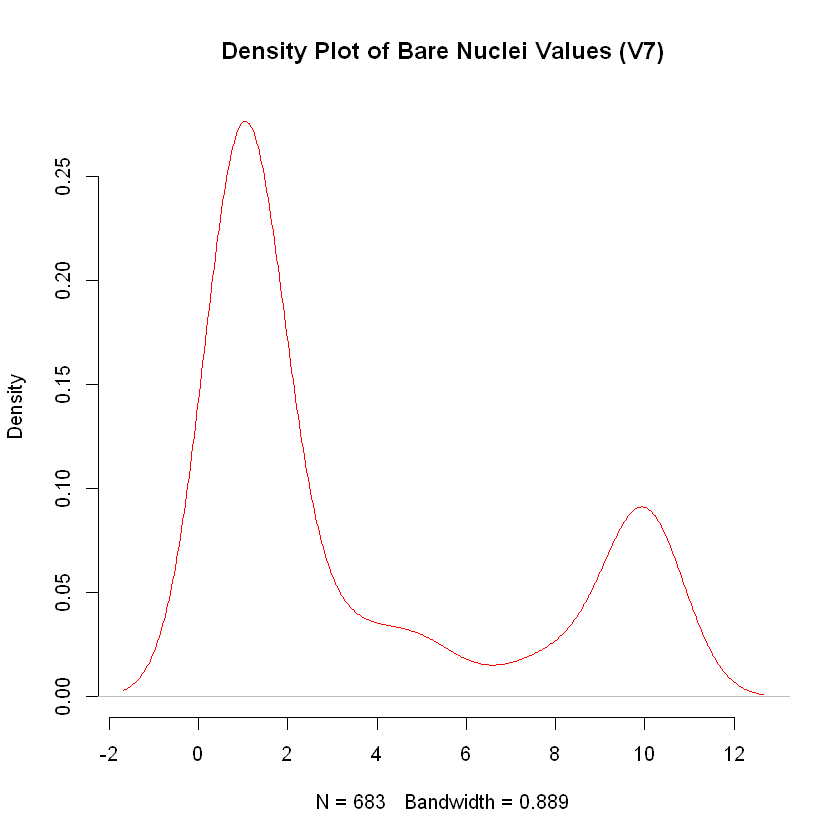

In [28]:
den <- density(cleaned$V7)
plot(den, frame=FALSE, col = 'red', main = "Density Plot of Bare Nuclei Values (V7)" )